In [1]:
'''
Zé Fonseca

620/02/16

Simulate data for a y=mx+c model and a cosmological model. 
Data is drawn from a gaussian distribution.
'''

import numpy as np
import scipy as sp
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy.interpolate import splrep, splev
%matplotlib inline
import time
import matplotlib.gridspec as gridspec


## Straight line

Details:
* N=10;
* $y=mx+c$ with fiducial $m=c=1$
* Errors: $\sigma_x=0.01(1+x)$, $\sigma_y=0.005$
* gaussian distribution from which we draw x: $x_c=0.5$, $\sigma_{x_c}=0.25$

In [2]:
#functions
#general functions

def func(x,m=1,c=1):
    return m*x+c

#class for fake data. Only reason to use class is because this is a copy of another iPython Notebook

class str_line:
    def __init__(self,name,N=10,m=1,c=1,sig_y=0.005,sig_x_per=0.01,xc=0.5,sig_xc=0.25):
        #parameters used
        self.N=N
        x=np.random.randn(N)*sig_xc+xc
        x.sort()
        self.x=x
        self.y=m*self.x+c
        self.y_obs=self.y+np.random.randn(N)*sig_y
        self.x_obs=x+np.random.randn(N)*sig_x_per*(1+x)
        self.sig_y=sig_y
        self.sig_x_per=sig_x_per
        self.xc=xc
        self.sig_xc=sig_xc
        self.dataset=name

In [3]:
def save_data_str(data):

    np.savetxt('general_datasets/data_'+data.dataset+'.txt',np.c_[data.x_obs,data.y_obs,data.x],fmt='%2.3f',\
           header='\n'.join(["Drawn from gaussian with x_c=%.1f and sig_xc=%.2f" %(data.xc,data.sig_xc),\
                             "Error in x %.3f (1+x), error in y %.3f " %(data.sig_x_per,data.sig_y),\
                             "%.0f data points" %data.N,
                             "x_obs  y_obs  x_true"]))

datasets_str={}
name_str=[]
for i in range(5):
    name_str.append('str_line_'+str(i+1))
    data=str_line(name_str[i])
    datasets_str[name_str[i]]=data
    save_data_str(data) 

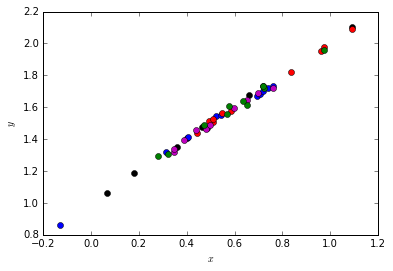

In [4]:
colors=['k','b','r','m','g']
for i in range(5):
    plt.plot(datasets_str[name_str[i]].x_obs,datasets_str[name_str[i]].y_obs,colors[i]+'o')

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

## Cosmological Data

Details:
* N=10;
* $\mu=5\log(D_L(\Omega_M,H_0,w)/{\rm Mpc})+25$ with fiducial $\Omega_M=0.31$, $H_0=67.74$, $w=-1$ (Neglect units)
* Errors: $\sigma_z=0.01(1+z)$, $\sigma_\mu=0.01$
* gaussian distribution from which we draw z: $z_c=0.5$, $\sigma_{z_c}=0.1$

In [5]:
#cosmological functions
#general functions
def invH(z,OM,w):
    return (OM*(1+z)**3+(1-OM)*(1+z)**(3*(w+1)))**(-.5)

c=2.99792e5

def mu(z,OM,H0,w):
    if type(z)=='float' or type(z)=='int':
        return 5*np.log10((1+z)/H0*c*quad(invH,0,z,args=(OM,w))[0])+25
    else:
        dl=[]
        for i in range(len(z)):
            dl.append(quad(invH,0,z[i],args=(OM,w))[0])
        return 5*np.log10(np.array(dl)*(1+z)*c/H0)+25

#class fake data with all the cases.

class cosmo_dat:
    def __init__(self,name,N=10,OM=0.31,H0=67.74,w=-1,zc=0.5,sig_zc=0.1,sig_mu=0.01,sig_z_per=0.01):
        #parameters used
        self.N=N
        self.OM=OM
        self.H0=H0
        self.w=w
        self.dataset=name
        
        #get redshifts
        z=np.random.randn(N)*sig_zc+zc
        z.sort()
        self.z=z
        self.zc=zc
        self.sig_zc=sig_zc
        
        #get magnitudes
        mu_t=mu(z,OM,H0,w)
        mu_obs=mu_t+np.random.randn(N)*sig_mu
        self.mu_t=mu_t
        self.mu_obs=mu_obs
        self.sig_mu=sig_mu
        
        #get observed redshifts
        z_obs=z+np.random.randn(N)*sig_z_per*(1+z)
        self.z_obs=z_obs
        self.sig_z_per=sig_z_per

In [6]:
def save_data_cosmo(data):

    np.savetxt('general_datasets/data_'+data.dataset+'.txt',np.c_[data.z_obs,data.mu_obs,data.z],fmt='%2.3f',\
           header='\n'.join(["Drawn from gaussian with z_c=%.1f and sig_zc=%.2f" %(data.zc,data.sig_zc),\
                             "Error in z %.3f (1+z), error in mu %.3f " %(data.sig_z_per,data.sig_mu),\
                             "%.0f data points" %data.N,
                             "z_obs  mu_obs  z_true"]))

datasets_cosmo={}
name_cosmo=[]
for i in range(5):
    name_cosmo.append('cosmoSNe_'+str(i+1))
    data=cosmo_dat(name_cosmo[i])
    datasets_cosmo[name_cosmo[i]]=data
    save_data_cosmo(data) 

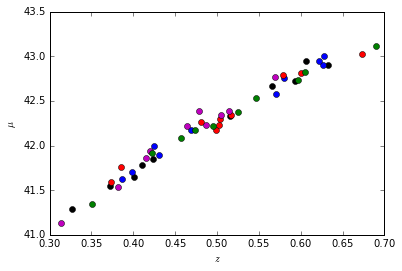

In [7]:
for i in range(5):
    plt.plot(datasets_cosmo[name_cosmo[i]].z_obs,datasets_cosmo[name_cosmo[i]].mu_obs,colors[i]+'o')

plt.xlabel(r'$z$')
plt.ylabel(r'$\mu$')
plt.show()